# Homework 3 - Xiao Bao Bao

In [1]:
# Author - Xiao Bao Bao 
# ECS 171 Intro to Machine Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sys
import mpl_toolkits

from math import sqrt

## Preprocessing

In [2]:
df = pd.read_csv('bitstrings.csv')
df.head()

,b15,b14,b13,b12,b11,b10,b9,b8,b7,b6,b5,b4,b3,b2,b1,b0
0,0,0,0,0,0,0,1,1,0,1,1,1,1,1,0,0
1,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
2,0,0,0,0,0,0,0,1,0,0,1,1,1,1,0,0
3,0,0,0,0,0,0,1,1,0,0,1,1,1,1,0,0
4,0,0,0,0,0,1,1,1,0,0,1,1,1,1,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   b15     1200 non-null   int64
 1   b14     1200 non-null   int64
 2   b13     1200 non-null   int64
 3   b12     1200 non-null   int64
 4   b11     1200 non-null   int64
 5   b10     1200 non-null   int64
 6   b9      1200 non-null   int64
 7   b8      1200 non-null   int64
 8   b7      1200 non-null   int64
 9   b6      1200 non-null   int64
 10  b5      1200 non-null   int64
 11  b4      1200 non-null   int64
 12  b3      1200 non-null   int64
 13  b2      1200 non-null   int64
 14  b1      1200 non-null   int64
 15  b0      1200 non-null   int64
dtypes: int64(16)
memory usage: 150.1 KB


In [4]:
df.shape

(1200, 16)

In [5]:
#easier readability
X = df[::].to_numpy()

## Agglomerative Clustering

### Exercise 1.1 - Choosing Parameters

Which linkage rule to use?



Which distance function to use?



What threshold distance to use?




### Exercise 1.2 - Agglomerative Clustering for Equivalence Classes (20 points)

37     10
318     9
77      8
363     8
155     7
       ..
415     1
414     1
413     1
411     1
783     1
Name: class, Length: 784, dtype: int64


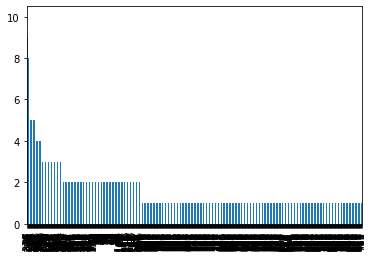

In [6]:
from sklearn.cluster import AgglomerativeClustering

agglo_clustering = AgglomerativeClustering(n_clusters=None, linkage="average", 
                                           affinity='euclidean', distance_threshold=0.8)
results = agglo_clustering.fit(X)

agglo_clustering = pd.Series(results.labels_, name='class')
distribution = agglo_clustering.value_counts()

_ = distribution.plot(kind='bar')
print(distribution)

In [7]:
import scipy
from scipy.cluster import hierarchy

clusters = hierarchy.linkage(X, method="average")

clusters[:15]

array([[0.000e+00, 4.900e+01, 0.000e+00, 2.000e+00],
       [1.000e+00, 3.000e+00, 0.000e+00, 2.000e+00],
       [2.000e+00, 1.900e+01, 0.000e+00, 2.000e+00],
       [5.000e+01, 1.201e+03, 0.000e+00, 3.000e+00],
       [7.700e+01, 1.203e+03, 0.000e+00, 4.000e+00],
       [9.600e+01, 1.204e+03, 0.000e+00, 5.000e+00],
       [4.600e+01, 1.202e+03, 0.000e+00, 3.000e+00],
       [4.100e+01, 8.700e+01, 0.000e+00, 2.000e+00],
       [6.000e+01, 1.200e+03, 0.000e+00, 3.000e+00],
       [6.900e+01, 1.208e+03, 0.000e+00, 4.000e+00],
       [1.060e+02, 1.209e+03, 0.000e+00, 5.000e+00],
       [2.900e+01, 3.300e+01, 0.000e+00, 2.000e+00],
       [7.900e+01, 1.211e+03, 0.000e+00, 3.000e+00],
       [6.280e+02, 6.420e+02, 0.000e+00, 2.000e+00],
       [6.800e+02, 1.213e+03, 0.000e+00, 3.000e+00]])

C:\Users\Xiao Bao Bao\anaconda3\envs\tensorflow_env\lib\site-packages\matplotlib\text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


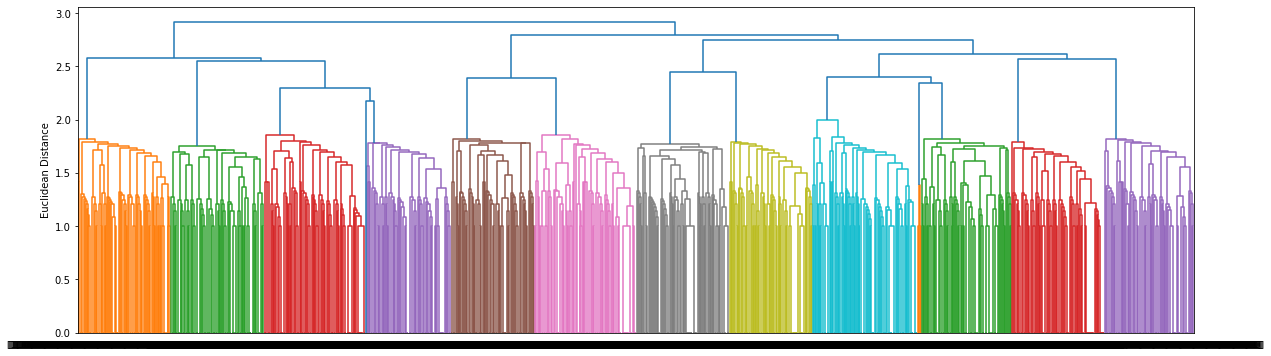

In [8]:
def plot_dendrogram(clusters):
    plt.figure(figsize=(20,6))
    dendrogram = hierarchy.dendrogram(clusters, labels=X, 
                                      orientation="top", leaf_font_size=9, leaf_rotation=360)
    plt.ylabel('Euclidean Distance')

plot_dendrogram(clusters)

## K-Means Clustering

### Exercise 2.1 - K-Means Clustering for Equivalence Classes

In [9]:
from sklearn.cluster import KMeans

#initialize cluster size
k = 24
kmeans = KMeans(n_clusters=k)

kmeans.fit(X)
#kmeans_labels = est.labels_

print(kmeans.labels_)

[14 14 14 ... 22  8 22]


7     104
4     100
6      97
5      89
1      88
15     86
17     83
13     81
22     77
14     72
16     58
21     42
2      32
11     26
18     22
3      21
9      20
20     20
10     18
19     17
0      14
8      12
12     11
23     10
Name: class, dtype: int64


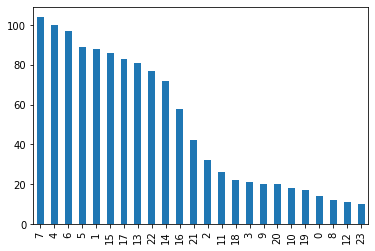

In [10]:
KMEANS_clustering = pd.Series(kmeans.labels_, name='class')
km_distribution = KMEANS_clustering.value_counts()

_ = km_distribution.plot(kind='bar')
print(km_distribution)

### Exercise 2.2 - Difference between Agglomerative Clustering and K-Means Clustering

Compare the result from Exercise 2.1 with that from Exercise 1.2, and explain

How the two results are different
Why there is such a difference

## Exercise 3 - Principal Component Analysis

### Exercise 3.1 - Generate 2 Clusters

In [11]:
#Initialize cluster size
k = 2
kmeans2 = KMeans(n_clusters=k)

kmeans2.fit(X)
print(kmeans2.labels_)

[1 1 1 ... 1 1 0]


1    784
0    416
Name: class, dtype: int64


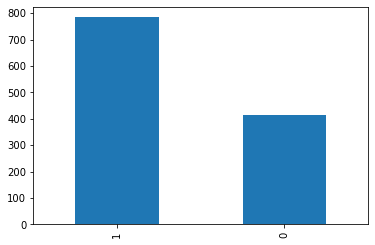

In [12]:
KMEANS_clustering = pd.Series(kmeans2.labels_, name='class')
km_distribution = KMEANS_clustering.value_counts()

_ = km_distribution.plot(kind='bar')
print(km_distribution)

### Exercise 3.2 - PCA for Feature Extraction

In [13]:
from sklearn import preprocessing
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

#scale the data?
standardScaler = preprocessing.StandardScaler()
pca_clustering = PCA(n_components=2)

X = standardScaler.fit_transform(X)
pca_clustering.fit(X)

#Obtain projected points along axis
X_pca = pca_clustering.transform(X)
#get PCA components
PC1, PC2 = pca_clustering.components_
#get variance in components from eigenvalues
PC1_var, PC2_var = pca_clustering.explained_variance_ratio_

X_pca[0]


array([-1.26772688,  0.93937468])

ValueError: 'c' argument has 2 elements, which is inconsistent with 'x' and 'y' with size 1200.

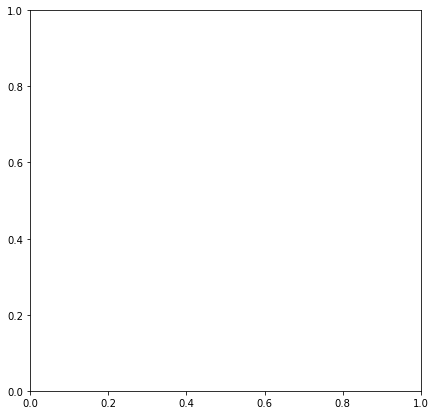

In [18]:
#Show scatter plot
colors = np.array(['tab:red', 'tab:green'])
plt.figure(figsize=(7,7))

#Loop through every datapoint and plot variance on scatterplot
#for i in X.shape:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=colors, alpha=0.5, label=f'Class')

plt.legend()
plt.xlabel("PC1({:.2%})".format(PC1_var))
plt.ylabel("PC2({:.2%})".format(PC2_var))

plt.show()